In [1]:
#importing necessary libraries and the cleaned survey df
from cleaned_survey import df

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

import warnings
warnings.filterwarnings('ignore')

In [2]:
#exploration of data
df.head()

,Timestamp,1. Have you ever been to Universal Studios?,2. How frequently do you visit a theme park?,3. What is your age?,4. What is your gender?,5. What is your monthly income?,"6. What is your nationality? If you select ""Other"", please specify.",7. Who do you usually go to theme parks with? (Select all that apply),8. What types of rides do you prefer?,9. What time of the day are you usually in the theme park? (Select all that apply),...,"28. What dissuades you from wanting to visit a theme park? If you select ""Other"", please specify",29. How do you typically decide which attractions to visit at a theme park?,"30. What do you spend the most money on in a theme park (excluding the admission ticket)? If you select ""Other"", please specify",31. (Optional - only if you have recently been to USS) Which areas did you visit and in what order? (Select only the areas which you have visited) [Hollywood],31. (Optional - only if you have recently been to USS) Which areas did you visit and in what order? (Select only the areas which you have visited) [Minion Land],31. (Optional - only if you have recently been to USS) Which areas did you visit and in what order? (Select only the areas which you have visited) [Far Far Away],31. (Optional - only if you have recently been to USS) Which areas did you visit and in what order? (Select only the areas which you have visited) [The Lost World],31. (Optional - only if you have recently been to USS) Which areas did you visit and in what order? (Select only the areas which you have visited) [Ancient Egypt],31. (Optional - only if you have recently been to USS) Which areas did you visit and in what order? (Select only the areas which you have visited) [Sci-fi City],31. (Optional - only if you have recently been to USS) Which areas did you visit and in what order? (Select only the areas which you have visited) [New York]
0,15/02/2025 19:01:30,Yes,Once every 2-3 years,19-25 years old,Female,No income,singaporean/pr,"Friends, Family",High-intensity rides,"Morning (10am-12pm), Afternoon (12pm-5pm), Eve...",...,"Crowd, Costs (F&B, admission tickets, etc.), L...",A mix of both of the above —some planned rides...,F&B,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,16/02/2025 10:44:01,Yes,Once every 2-3 years,19-25 years old,Female,No income,singaporean/pr,"Friends, Family",High-intensity rides,"Morning (10am-12pm), Afternoon (12pm-5pm), Eve...",...,"Crowd, Costs (F&B, admission tickets, etc.), L...",I stick to the few rides/attractions that I en...,F&B,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,16/02/2025 11:16:23,Yes,When on vacation,19-25 years old,Male,No income,singaporean/pr,"Friends, Family",Medium-intensity rides,"Morning (10am-12pm), Afternoon (12pm-5pm)",...,"Crowd, Costs (F&B, admission tickets, etc.), L...",A mix of both of the above —some planned rides...,F&B,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,16/02/2025 11:22:17,Yes,< Once every 3 years,46-54 years old,Female,"$6,000 - $9,999",singaporean/pr,Family,Low-intensity rides,Morning (10am-12pm),...,"Crowd, Costs (F&B, admission tickets, etc.), L...",A mix of both of the above —some planned rides...,"Transportation (e.g. Parking, taxi fares etc.)",NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,16/02/2025 11:22:40,Yes,< Once every 3 years,55 and above,Female,No income,singaporean/pr,Family,I do not go on any rides,"Morning (10am-12pm), Afternoon (12pm-5pm), Eve...",...,"Costs (F&B, admission tickets, etc.), Unpredic...",A mix of both of the above —some planned rides...,F&B,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
#making new dataframe consisting of only variables of interest to guest segmentation
demographics = df.iloc[:,2:9]
occasion = df.iloc[:,10]
spending_cat = df.iloc[:,37]

new_df = pd.concat([demographics,occasion,spending_cat], axis = 1)
new_df.head()

,2. How frequently do you visit a theme park?,3. What is your age?,4. What is your gender?,5. What is your monthly income?,"6. What is your nationality? If you select ""Other"", please specify.",7. Who do you usually go to theme parks with? (Select all that apply),8. What types of rides do you prefer?,10. When are you most likely to visit a theme park? (Select all that apply),"30. What do you spend the most money on in a theme park (excluding the admission ticket)? If you select ""Other"", please specify"
0,Once every 2-3 years,19-25 years old,Female,No income,singaporean/pr,"Friends, Family",High-intensity rides,"School Holidays, For special events (eg. Hallo...",F&B
1,Once every 2-3 years,19-25 years old,Female,No income,singaporean/pr,"Friends, Family",High-intensity rides,"Weekdays (Mondays to Thursdays), School Holida...",F&B
2,When on vacation,19-25 years old,Male,No income,singaporean/pr,"Friends, Family",Medium-intensity rides,"Fridays, Saturdays, Sundays, For special event...",F&B
3,< Once every 3 years,46-54 years old,Female,"$6,000 - $9,999",singaporean/pr,Family,Low-intensity rides,Public Holidays,"Transportation (e.g. Parking, taxi fares etc.)"
4,< Once every 3 years,55 and above,Female,No income,singaporean/pr,Family,I do not go on any rides,"Saturdays, Sundays, Public Holidays, School Ho...",F&B


In [4]:
#renaming the columns for easy access
new_df.columns = ['frequency','age','gender','monthly_income','nationality','companion','ride_intensity','occasion','spending_cat']
new_df.head()

,frequency,age,gender,monthly_income,nationality,companion,ride_intensity,occasion,spending_cat
0,Once every 2-3 years,19-25 years old,Female,No income,singaporean/pr,"Friends, Family",High-intensity rides,"School Holidays, For special events (eg. Hallo...",F&B
1,Once every 2-3 years,19-25 years old,Female,No income,singaporean/pr,"Friends, Family",High-intensity rides,"Weekdays (Mondays to Thursdays), School Holida...",F&B
2,When on vacation,19-25 years old,Male,No income,singaporean/pr,"Friends, Family",Medium-intensity rides,"Fridays, Saturdays, Sundays, For special event...",F&B
3,< Once every 3 years,46-54 years old,Female,"$6,000 - $9,999",singaporean/pr,Family,Low-intensity rides,Public Holidays,"Transportation (e.g. Parking, taxi fares etc.)"
4,< Once every 3 years,55 and above,Female,No income,singaporean/pr,Family,I do not go on any rides,"Saturdays, Sundays, Public Holidays, School Ho...",F&B


In [5]:
#data processing and feature engineering
#mapping frequencies to rare, moderate, frequent, traveller
freq_mapping = {
    '< Once every 3 years': 'rare',
    'Once every 2-3 years': 'rare',
    'Once every year': 'moderate',
    'A few times every year': 'frequent',
    'Once every month': 'frequent',
    '> Once every month': 'frequent',
    'When on vacation': 'traveller'
}
new_df['frequency'] = new_df['frequency'].replace(freq_mapping) 

#mapping age to young, adults, middle-aged, elderly
age_mapping = {
    '<15 years old': 'young',
    '15-18 years old': 'young',
    '19-25 years old': 'adult',
    '26-35 years old': 'adult',
    '36-45 years old': 'middle-aged',
    '46-54 years old': 'middle-aged',
    '55 and above': 'elderly'
}
new_df['age'] = new_df['age'].replace(age_mapping)

#converting gender values to lower case for consistency
new_df['gender'] = new_df['gender'].str.lower()

#mapping monthly income to low, middle and high
income_mapping = {
    'No income':'low',
    'Below $2000': 'low',
    '$2,000 - $5,999': 'middle',
    '$6,000 - $9,999': 'middle',
    '$10,000 - $19,999': 'high',
    '$20,000 and above': 'high'
}
new_df['monthly_income'] = new_df['monthly_income'].replace(income_mapping)

#mapping nationality to singaporean/pr and foreigners
new_df['nationality'] = new_df['nationality'].apply(lambda x: 'foreigners' if x != 'singaporean/pr' else x)

#exploding the companion column to create separate rows for people who selected more than 1 option
companion_mapping = {
    'Couple (I go with my partner)': 'partner', 
    'Single (I go alone)': 'alone',
    'Friends': 'friends',
    'Family': 'family'
}
new_df['companion'] = new_df['companion'].str.split(", ")
new_df = new_df.explode("companion").reset_index(drop=True)
new_df['companion'] = new_df['companion'].replace(companion_mapping)

#mapping ride intensity values to low, medium, high and do not ride
intensity_mapping = {
    'Low-intensity rides': 'low',
    'Medium-intensity rides': 'medium',
    'High-intensity rides': 'high',
    'I do not go on any rides': 'do not ride'
}
new_df['ride_intensity'] = new_df['ride_intensity'].replace(intensity_mapping)

#exploding the occasion column to create separate rows for people who selected more than 1 option
occasion_mapping = {
    'Weekdays (Mondays to Thursdays)': 'weekdays',
    'For special events (eg. Halloween': 'events',
    'Evenings/Night visits (After 6pm)': 'evening visits',
    'Fridays': 'fridays',
    'Saturdays': 'saturdays',
    'Sundays': 'sundays',
    'Public Holidays': 'public holidays',
    'School Holidays': 'school holidays'
}
new_df['occasion'] = new_df['occasion'].str.split(", ")
new_df = new_df.explode("occasion").reset_index(drop=True)
new_df['occasion'] = new_df['occasion'].replace(occasion_mapping)
new_df = new_df.query("occasion != 'Christmas etc.)'")

new_df

,frequency,age,gender,monthly_income,nationality,companion,ride_intensity,occasion,spending_cat
0,rare,adult,female,low,singaporean/pr,friends,high,school holidays,F&B
1,rare,adult,female,low,singaporean/pr,friends,high,events,F&B
3,rare,adult,female,low,singaporean/pr,family,high,school holidays,F&B
4,rare,adult,female,low,singaporean/pr,family,high,events,F&B
6,rare,adult,female,low,singaporean/pr,friends,high,weekdays,F&B
...,...,...,...,...,...,...,...,...,...
814,rare,adult,male,low,singaporean/pr,friends,medium,school holidays,F&B
815,traveller,middle-aged,female,middle,singaporean/pr,family,low,weekdays,"Transportation (e.g. Parking, taxi fares etc.)"
816,moderate,young,female,low,singaporean/pr,friends,high,saturdays,F&B
817,moderate,young,female,low,singaporean/pr,friends,high,sundays,F&B


In [6]:
#categorising those who spend most on transport as low spenders; 
#those who spend most on f&b as average spenders;
#those who spend most on merchandise as high spenders
spender_mapping = {
    'Transportation (e.g. Parking, taxi fares etc.)': 'low spender',
    'F&B': 'average spender',
    'Merchandise': 'high spender'
}

spending_order = ['low spender', 'average spender', 'high spender']

new_df['spending_cat'] = new_df['spending_cat'].replace(spender_mapping)
new_df = new_df.rename(columns={'spending_cat':'spender_type'})
new_df['spender_type'] = pd.Categorical(new_df['spender_type'], categories=spending_order, ordered=True)

new_df.head()

,frequency,age,gender,monthly_income,nationality,companion,ride_intensity,occasion,spender_type
0,rare,adult,female,low,singaporean/pr,friends,high,school holidays,average spender
1,rare,adult,female,low,singaporean/pr,friends,high,events,average spender
3,rare,adult,female,low,singaporean/pr,family,high,school holidays,average spender
4,rare,adult,female,low,singaporean/pr,family,high,events,average spender
6,rare,adult,female,low,singaporean/pr,friends,high,weekdays,average spender


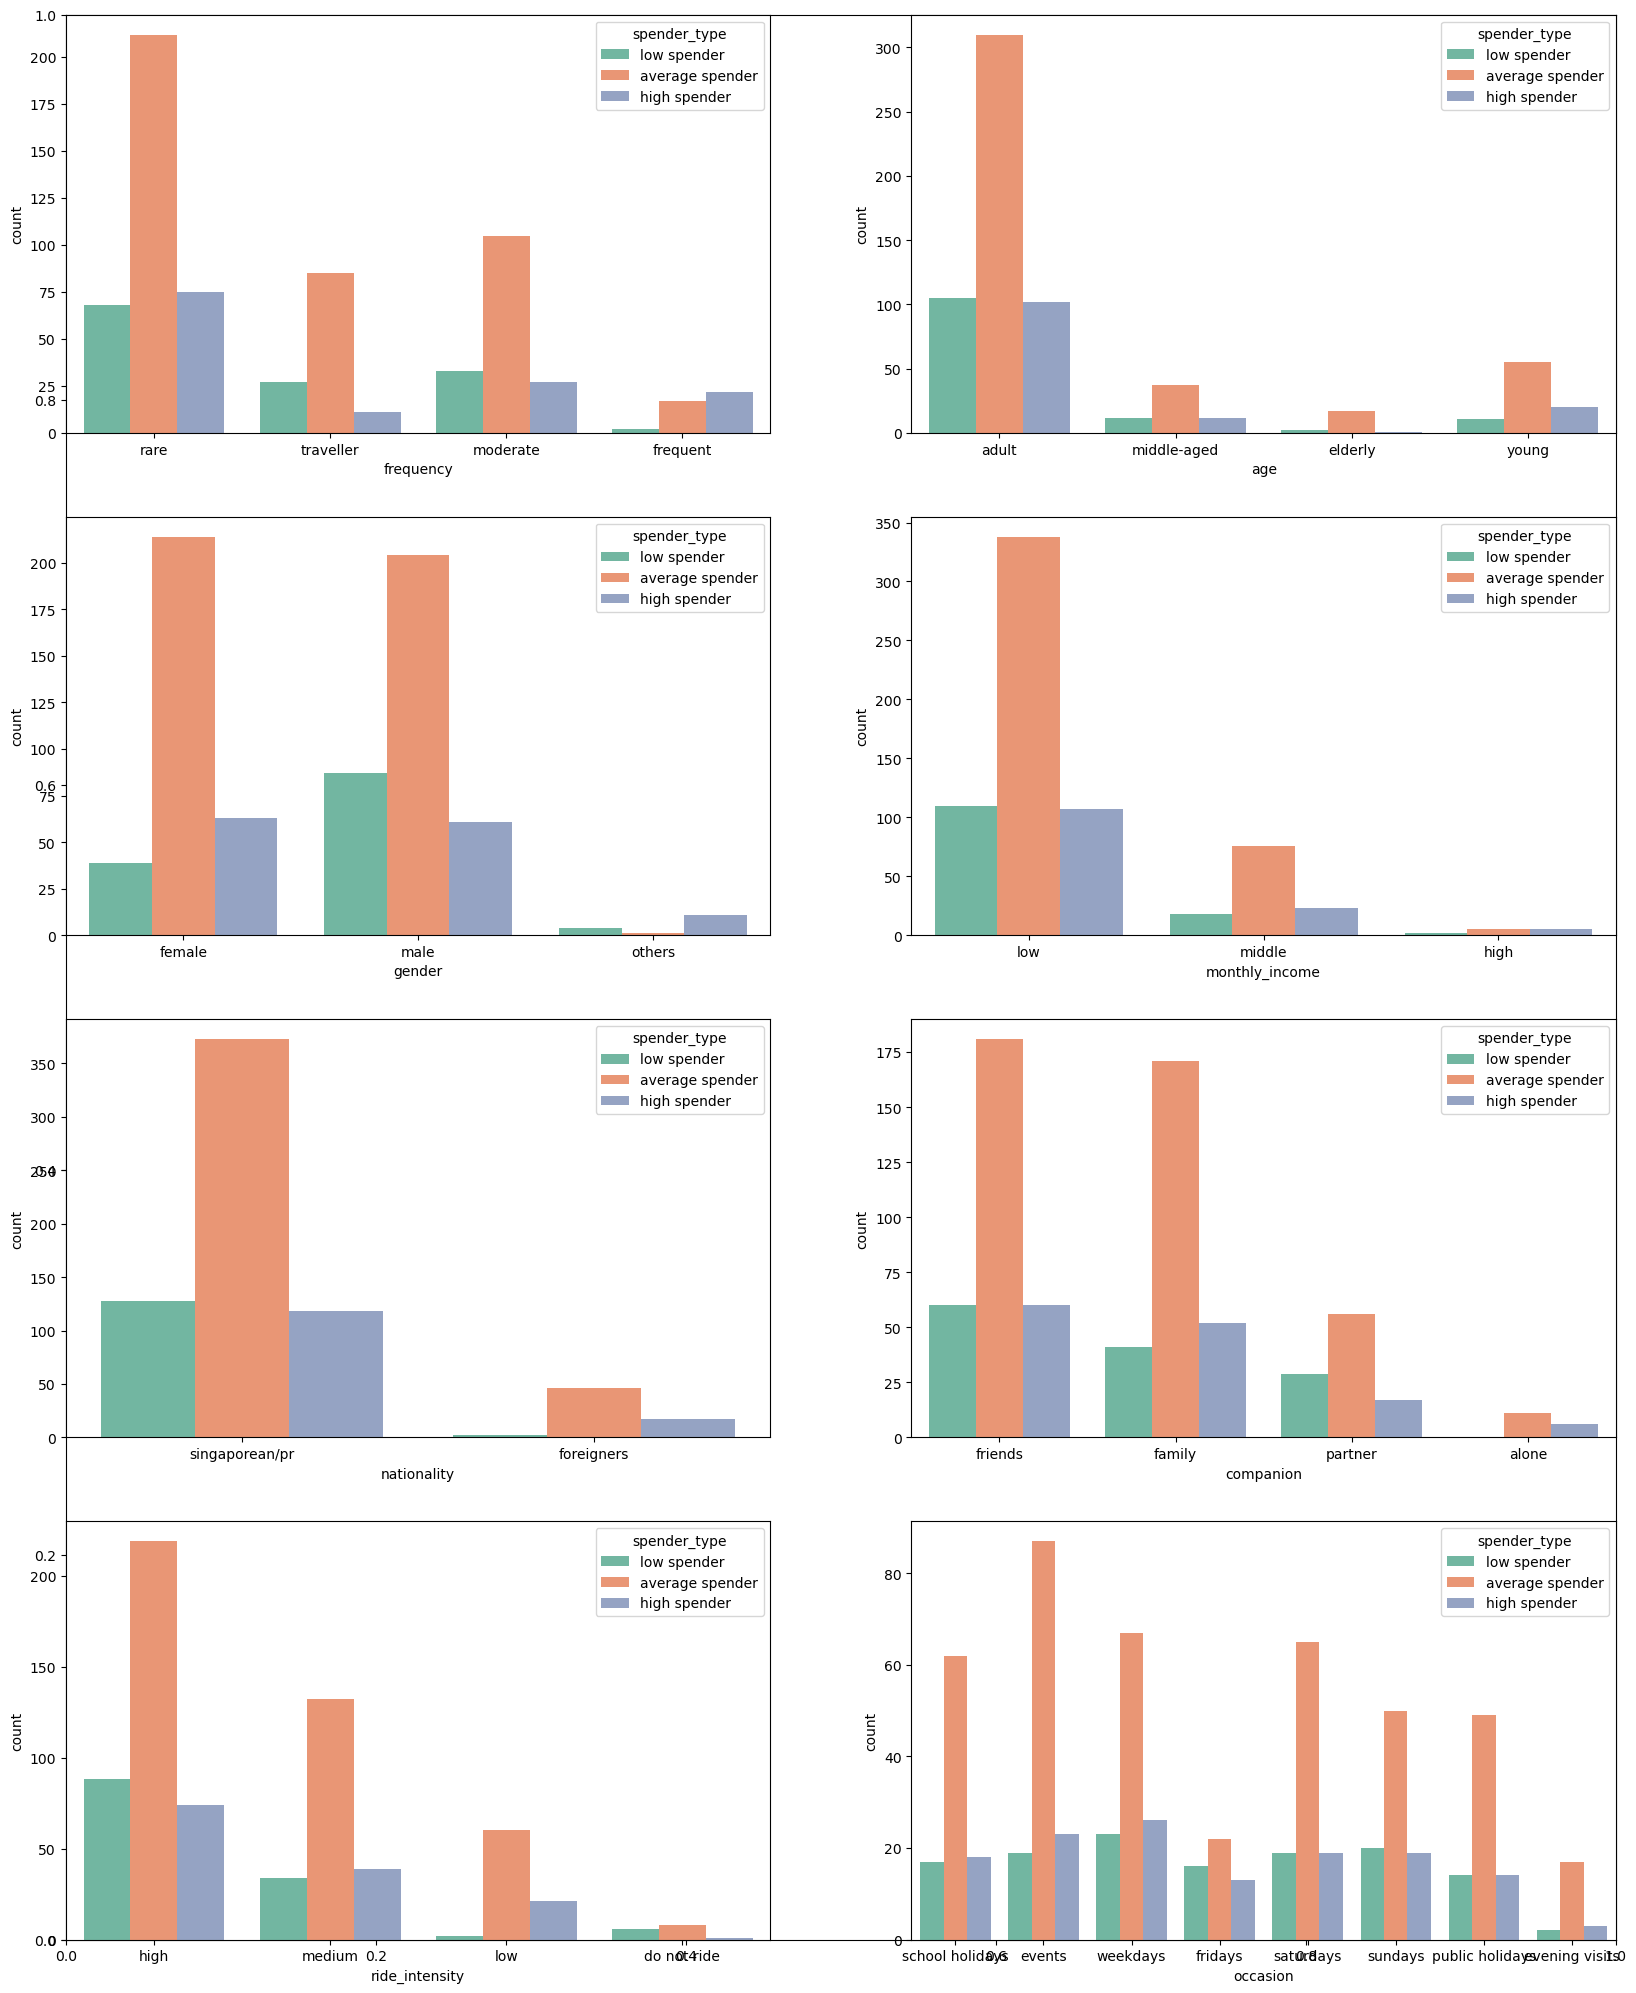

In [7]:
#exploratory data visualisations of each demographic and their highest spending category
objects = []
for col in new_df.columns:
    if new_df[col].dtype == object:
        objects.append(col)

plt.subplots(figsize=(20, 25))
for i, col in enumerate(objects):
    plt.subplot(4, 2, i + 1)
    sb.countplot(x=col, hue='spender_type', data=new_df, palette='Set2')
plt.show()

In [8]:
#make freq_df that counts the number of spender types by frequency 
freq_order = ['rare', 'moderate', 'frequent', 'traveller']
new_df['frequency'] = pd.Categorical(new_df['frequency'], categories=freq_order, ordered=True)

freq_df = new_df.groupby('frequency')['spender_type'].value_counts().reset_index(name='No. of spender types based on frequency')
freq_df.sort_values(['spender_type', 'frequency'], inplace=True)
freq_df.reset_index(drop=True, inplace=True)

freq_df

,frequency,spender_type,No. of spender types based on frequency
0,rare,low spender,68
1,moderate,low spender,33
2,frequent,low spender,2
3,traveller,low spender,27
4,rare,average spender,212
5,moderate,average spender,105
6,frequent,average spender,17
7,traveller,average spender,85
8,rare,high spender,75
9,moderate,high spender,27


In [9]:
#make age_df that counts the number of spender types by age 
age_order = ['young', 'adult', 'middle-aged', 'elderly']
new_df['age'] = pd.Categorical(new_df['age'], categories=age_order, ordered=True)

age_df = new_df.groupby('age')['spender_type'].value_counts().reset_index(name='No. of spender types based on age')
age_df.sort_values(['spender_type', 'age'], inplace=True)
age_df.reset_index(drop=True, inplace=True)

age_df

,age,spender_type,No. of spender types based on age
0,young,low spender,11
1,adult,low spender,105
2,middle-aged,low spender,12
3,elderly,low spender,2
4,young,average spender,55
5,adult,average spender,310
6,middle-aged,average spender,37
7,elderly,average spender,17
8,young,high spender,20
9,adult,high spender,102


In [10]:
#make gender_df that counts the number of spender types by gender
gender_df = new_df.groupby('gender')['spender_type'].value_counts().reset_index(name='No. of spender types based on gender')
gender_df.sort_values('spender_type', inplace=True)
gender_df.reset_index(drop=True, inplace=True)

gender_df

,gender,spender_type,No. of spender types based on gender
0,female,low spender,39
1,male,low spender,87
2,others,low spender,4
3,female,average spender,214
4,male,average spender,204
5,others,average spender,1
6,female,high spender,63
7,male,high spender,61
8,others,high spender,11


In [11]:
#make income_df that counts the number of spender types by monthly income
income_order = ['low', 'middle', 'high']
new_df['monthly_income'] = pd.Categorical(new_df['monthly_income'], categories=income_order, ordered=True)

income_df = new_df.groupby('monthly_income')['spender_type'].value_counts().reset_index(name='No. of spender types based on monthly income')
income_df.sort_values(['spender_type', 'monthly_income'], inplace=True)
income_df.reset_index(drop=True, inplace=True)

income_df

,monthly_income,spender_type,No. of spender types based on monthly income
0,low,low spender,110
1,middle,low spender,18
2,high,low spender,2
3,low,average spender,338
4,middle,average spender,76
5,high,average spender,5
6,low,high spender,107
7,middle,high spender,23
8,high,high spender,5


In [12]:
#make nationality_df that counts the number of spender types by nationality
nationality_df = new_df.groupby('nationality')['spender_type'].value_counts().reset_index(name='No. of spender types based on nationality')
nationality_df.sort_values('spender_type', inplace=True)
nationality_df.reset_index(drop=True, inplace=True)

nationality_df

,nationality,spender_type,No. of spender types based on nationality
0,foreigners,low spender,2
1,singaporean/pr,low spender,128
2,foreigners,average spender,46
3,singaporean/pr,average spender,373
4,foreigners,high spender,17
5,singaporean/pr,high spender,118


In [13]:
#make intensity_df that counts the number of spender types by ride intensity
ride_order = ['do not ride', 'low', 'medium', 'high']
new_df['ride_intensity'] = pd.Categorical(new_df['ride_intensity'], categories=ride_order, ordered=True)

intensity_df = new_df.groupby('ride_intensity')['spender_type'].value_counts().reset_index(name='No. of spender types based on ride intensity')
intensity_df.sort_values(['spender_type', 'ride_intensity'], inplace=True)
intensity_df.reset_index(drop=True, inplace=True)

intensity_df

,ride_intensity,spender_type,No. of spender types based on ride intensity
0,do not ride,low spender,6
1,low,low spender,2
2,medium,low spender,34
3,high,low spender,88
4,do not ride,average spender,8
5,low,average spender,60
6,medium,average spender,132
7,high,average spender,219
8,do not ride,high spender,1
9,low,high spender,21


In [14]:
#make companion_df that counts the number of spender types by who people go to theme parks with
companion_df = new_df.groupby('companion')['spender_type'].value_counts().reset_index(name='No. of spender types based on who they go with')
companion_df.sort_values('spender_type', inplace=True)
companion_df.reset_index(drop=True, inplace=True)

companion_df

,companion,spender_type,No. of spender types based on who they go with
0,alone,low spender,0
1,family,low spender,41
2,friends,low spender,60
3,partner,low spender,29
4,alone,average spender,11
5,family,average spender,171
6,friends,average spender,181
7,partner,average spender,56
8,alone,high spender,6
9,family,high spender,52


In [15]:
#make occasion_df that counts the number of spender types by when people go to theme parks
occasion_df = new_df.groupby('occasion')['spender_type'].value_counts().reset_index(name='No. of spender types based when they go to theme parks')
occasion_df.sort_values('spender_type', inplace=True)
occasion_df.reset_index(drop=True, inplace=True)

occasion_df

,occasion,spender_type,No. of spender types based when they go to theme parks
0,weekdays,low spender,23
1,evening visits,low spender,2
2,sundays,low spender,20
3,events,low spender,19
4,school holidays,low spender,17
5,fridays,low spender,16
6,saturdays,low spender,19
7,public holidays,low spender,14
8,weekdays,average spender,67
9,sundays,average spender,50


In [16]:
#encode each categorical variable accordingly
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

label_encoder = LabelEncoder()
onehot_encoder = OneHotEncoder(sparse_output=False, drop='first')

ordinal = ['frequency', 'age', 'monthly_income', 'ride_intensity', 'spender_type']
nominal = ['gender', 'nationality', 'companion', 'occasion']

#use label encoder for ordinal variables
for var in ordinal:
    new_df[var] = label_encoder.fit_transform(new_df[var])

#use one hot encoder for nominal variables
for var in nominal:
    var_reshaped = pd.DataFrame(new_df[var], columns=[var])
    new_df[var] = onehot_encoder.fit_transform(var_reshaped)

new_df.head()

,frequency,age,gender,monthly_income,nationality,companion,ride_intensity,occasion,spender_type
0,2,0,0.0,1,1.0,0.0,1,0.0,0
1,2,0,0.0,1,1.0,0.0,1,1.0,0
3,2,0,0.0,1,1.0,1.0,1,0.0,0
4,2,0,0.0,1,1.0,1.0,1,1.0,0
6,2,0,0.0,1,1.0,0.0,1,0.0,0


In [17]:
#using random forest to predict spender type
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#splitting train and test data
X = new_df.iloc[:, 0:-1]
y = new_df.iloc[:,-1]
feature_names = X.columns
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.2, random_state=10)

#fitting random forest on the train data
rf = RandomForestClassifier(n_estimators=100, random_state=10)
rf.fit(X_train, y_train)

#Gini feature importance using random forest
importances = rf.feature_importances_
feature_imp = pd.DataFrame({'Feature': feature_names, 'Gini Importance': importances}).sort_values('Gini Importance', ascending=False).reset_index()
feature_imp = feature_imp.drop(['index'],axis=1)
feature_imp

,Feature,Gini Importance
0,frequency,0.259624
1,ride_intensity,0.225170
2,age,0.148508
3,gender,0.099948
4,monthly_income,0.093510
5,nationality,0.066037
6,companion,0.056631
7,occasion,0.050573


In [18]:
#permutation feature importance
from sklearn.inspection import permutation_importance

#permutation importance randomly shuffles a single feature's values and measures the resulting performance decrease
result = permutation_importance(rf, X_test, y_test, n_repeats=10, random_state=20, n_jobs=-1)
imp_df = pd.DataFrame({'Feature': feature_names, 'Permutation Importance': result.importances_mean}).sort_values('Permutation Importance', ascending=False).reset_index()
imp_df = imp_df.drop(['index'],axis=1)
imp_df

,Feature,Permutation Importance
0,ride_intensity,0.123741
1,age,0.117266
2,gender,0.113669
3,frequency,0.089928
4,monthly_income,0.058993
5,nationality,0.050360
6,companion,0.028777
7,occasion,-0.010791


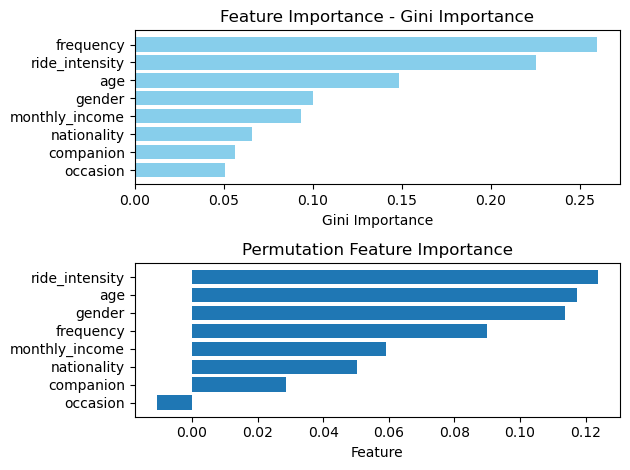

In [19]:
#plots comparing Gini importance and permutation importance
#Gini importance plot
plt.subplot(2, 1, 1)
plt.barh(feature_imp['Feature'], feature_imp['Gini Importance'], color='skyblue')
plt.xlabel('Gini Importance')
plt.title('Feature Importance - Gini Importance')
plt.gca().invert_yaxis()  # Invert y-axis for better visualization

#permutation feature importance plot
plt.subplot(2, 1, 2)
plt.barh(imp_df['Feature'], imp_df['Permutation Importance'])
plt.xlabel('Feature')
plt.title('Permutation Feature Importance')
plt.gca().invert_yaxis()

plt.tight_layout()
plt.show()